In [5]:
# To classify Fashion MNIST with a simple CNN in Keras

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist;
import numpy as np

import matplotlib.pyplot as plt

# Loading fashion-mnist train data and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualize the data

x_train shape: (60000, 28, 28) 
y_train shape: (60000,)
60000 train set
10000 test set
y = 2 is Pullover


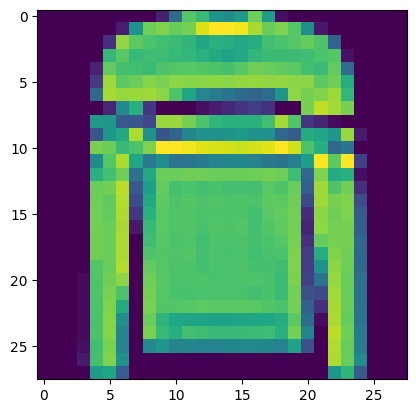

In [10]:
# Print training set shape - 60,000 train labels, image size of 28x28)
print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape)

# no. of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Text labels
fashion_mnist_labels = ["T-shirt/top",  # 0
                        "Trouser",      # 1
                        "Pullover",     # 2
                        "Dress",        # 3
                        "Coat",         # 4
                        "Sandal",       # 5
                        "Shirt",        # 6
                        "Sneaker",      # 7
                        "Bag",          # 8
                        "Ankle boot"]   # 9

# Image index, no. between 0 and 59,999
img_index = 5

# y_train contains lables, ranging from 0 to 9
label_index = y_train[img_index]

# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " is " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [11]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

x_train.shape

(60000, 28, 28, 1)

In [13]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import Sequential

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

In [ ]:
BATCH_SIZE=1000
EPOCHS = 20

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
%time history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Epoch 1/20
48/48 [==============================] - 77s 2s/step - loss: 8.9086 - accuracy: 0.4093 - val_loss: 0.8868 - val_accuracy: 0.6864
Epoch 2/20
48/48 [==============================] - 71s 1s/step - loss: 1.1184 - accuracy: 0.6165 - val_loss: 0.6267 - val_accuracy: 0.7676
Epoch 3/20
48/48 [==============================] - 65s 1s/step - loss: 0.8376 - accuracy: 0.6948 - val_loss: 0.5436 - val_accuracy: 0.7932
Epoch 4/20
48/48 [==============================] - 65s 1s/step - loss: 0.7361 - accuracy: 0.7305 - val_loss: 0.5162 - val_accuracy: 0.8025
Epoch 5/20
48/48 [==============================] - 61s 1s/step - loss: 0.6832 - accuracy: 0.7464 - val_loss: 0.4912 - val_accuracy: 0.8148
Epoch 6/20
36/48 [=====================>........] - ETA: 15s - loss: 0.6539 - accuracy: 0.7539

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE)
train_accuracy

60/60 [==============================] - 22s 364ms/step - loss: 0.3138 - accuracy: 0.8838


0.8837666511535645

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

10/10 [==============================] - 3s 327ms/step - loss: 0.3525 - accuracy: 0.8721


0.8720999956130981

313/313 [==============================] - 4s 12ms/step


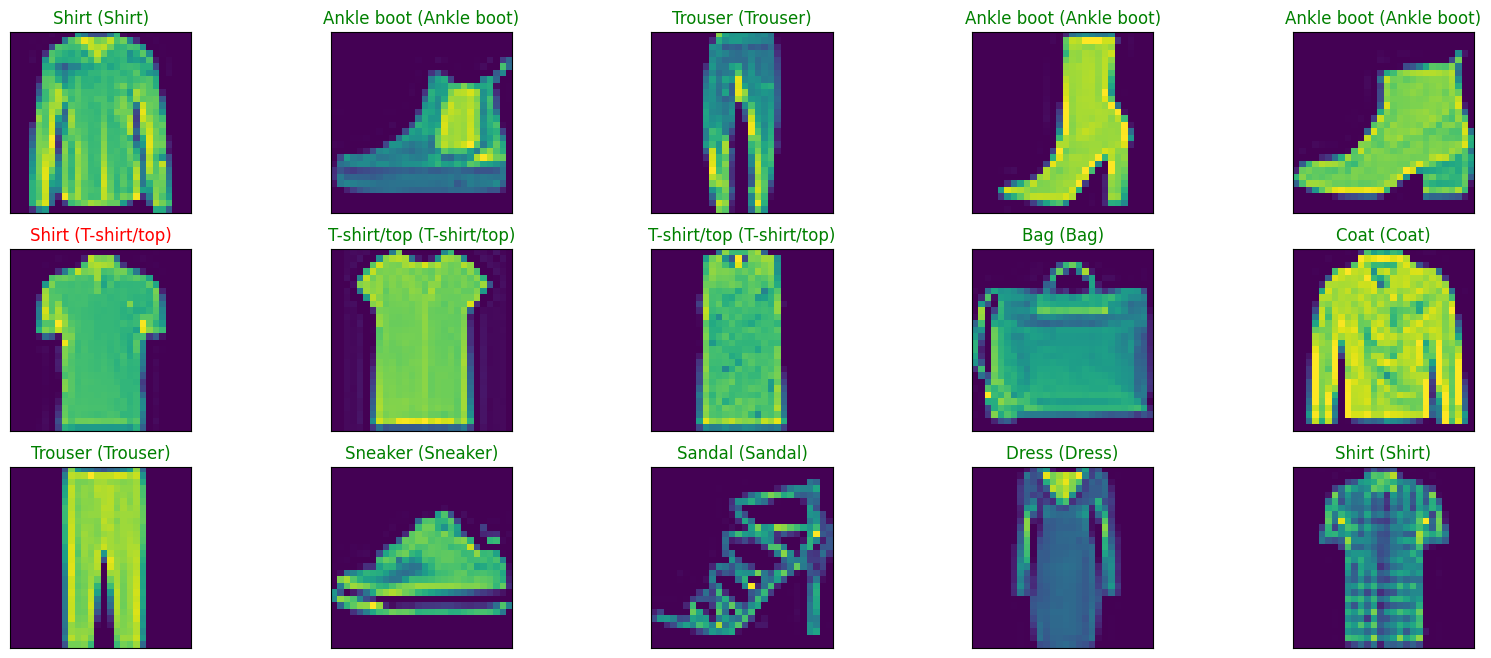

In [ ]:
y_hat = model.predict(x_test)

# Plotting random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))